In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE, r2_score

# Car price prediction 

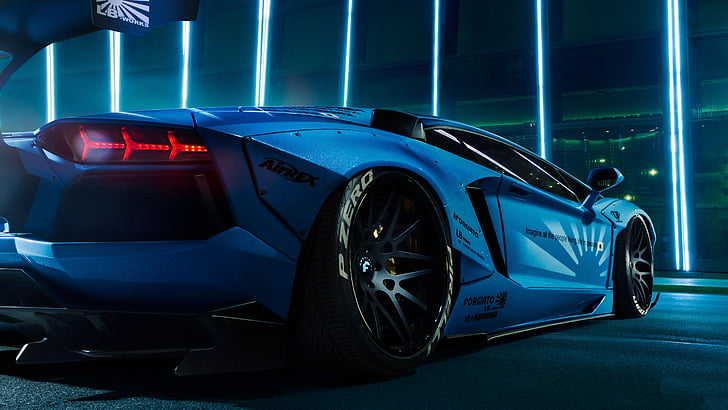


## Introduction

Predicting the price of a car is a complex task influenced by various factors, including brand reputation, features, horsepower, and mileage. Car price prediction is a fascinating area of machine learning research, and this project serves as an ideal starting point for those interested in exploring this field. In this project, we will guide you through the process of building a car price prediction model using machine learning techniques.

## Objectives

Our goal is to develop a robust car price prediction model by leveraging a dataset that contains detailed information about cars, including their specifications and prices. Throughout this project, you will learn the crucial steps of data preprocessing, model training, and performance evaluation.

# Data exploring 

In [3]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

In [8]:
for col in data:
    print(data[col].value_counts())

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
94.5     21
93.7     20
95.7     13
96

In [9]:
data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


## Correlation matrix

In [41]:
corr_matrix=data.corr()

In [36]:
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


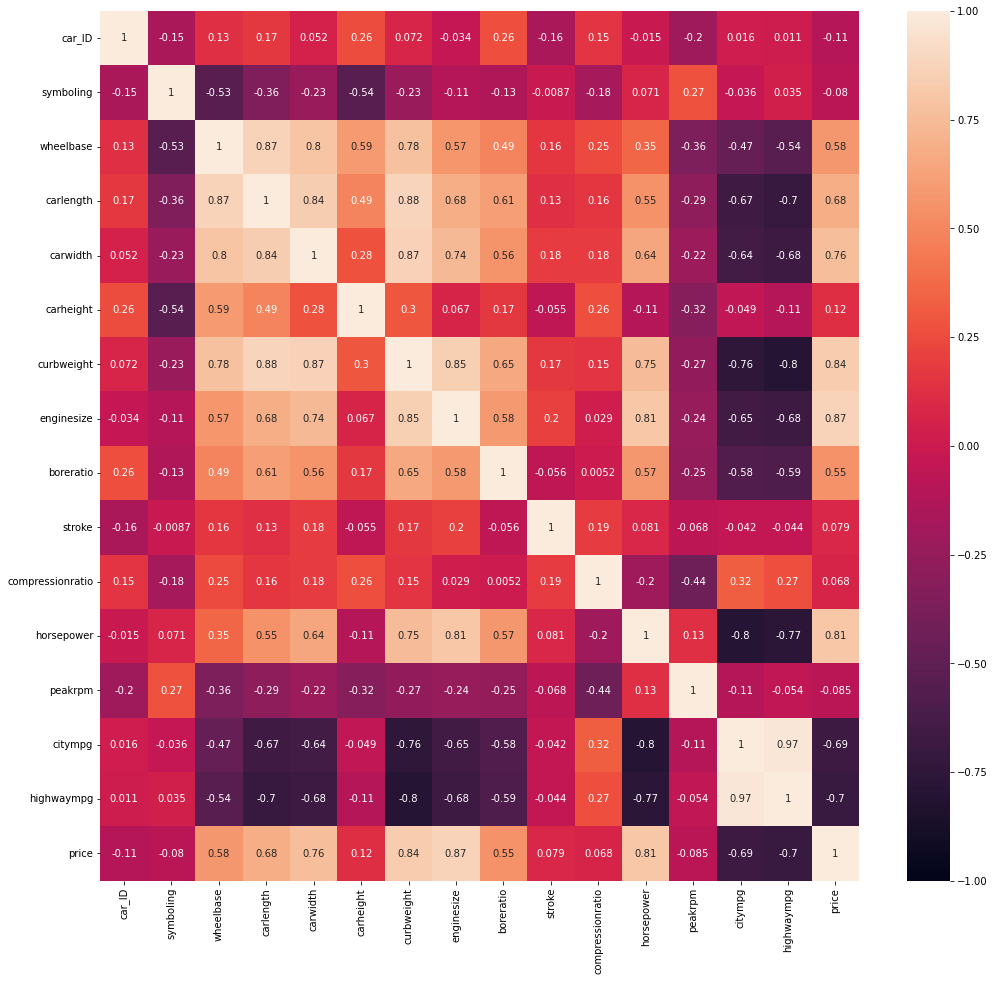

In [11]:
plt.figure(figsize=(17,16))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()
#Wheelbase carlength carwidth enginesize boreratio horsepower citympg highwaympg

In [42]:
price_corr_vector=corr_matrix['price'].sort_values(ascending=False)

In [43]:
price_corr_vector

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

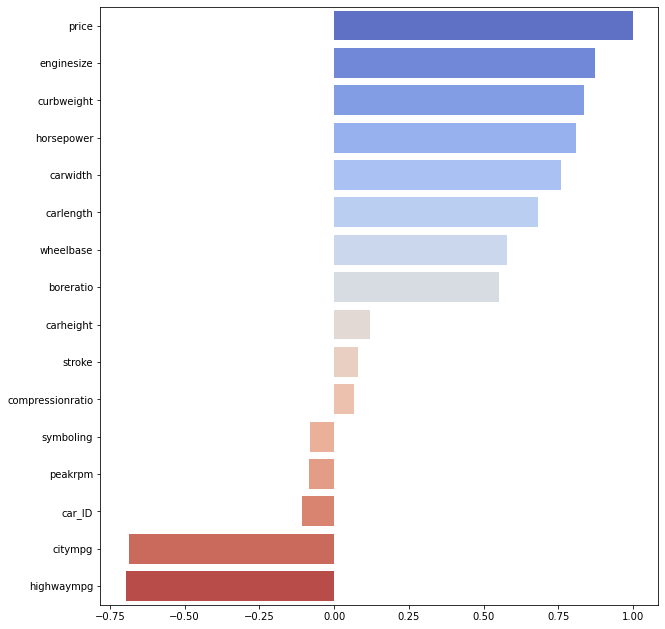

In [55]:
plt.figure(figsize=(10,11))
sns.barplot(x=price_corr_vector.values,y=price_corr_vector.index,palette='coolwarm')
plt.show()

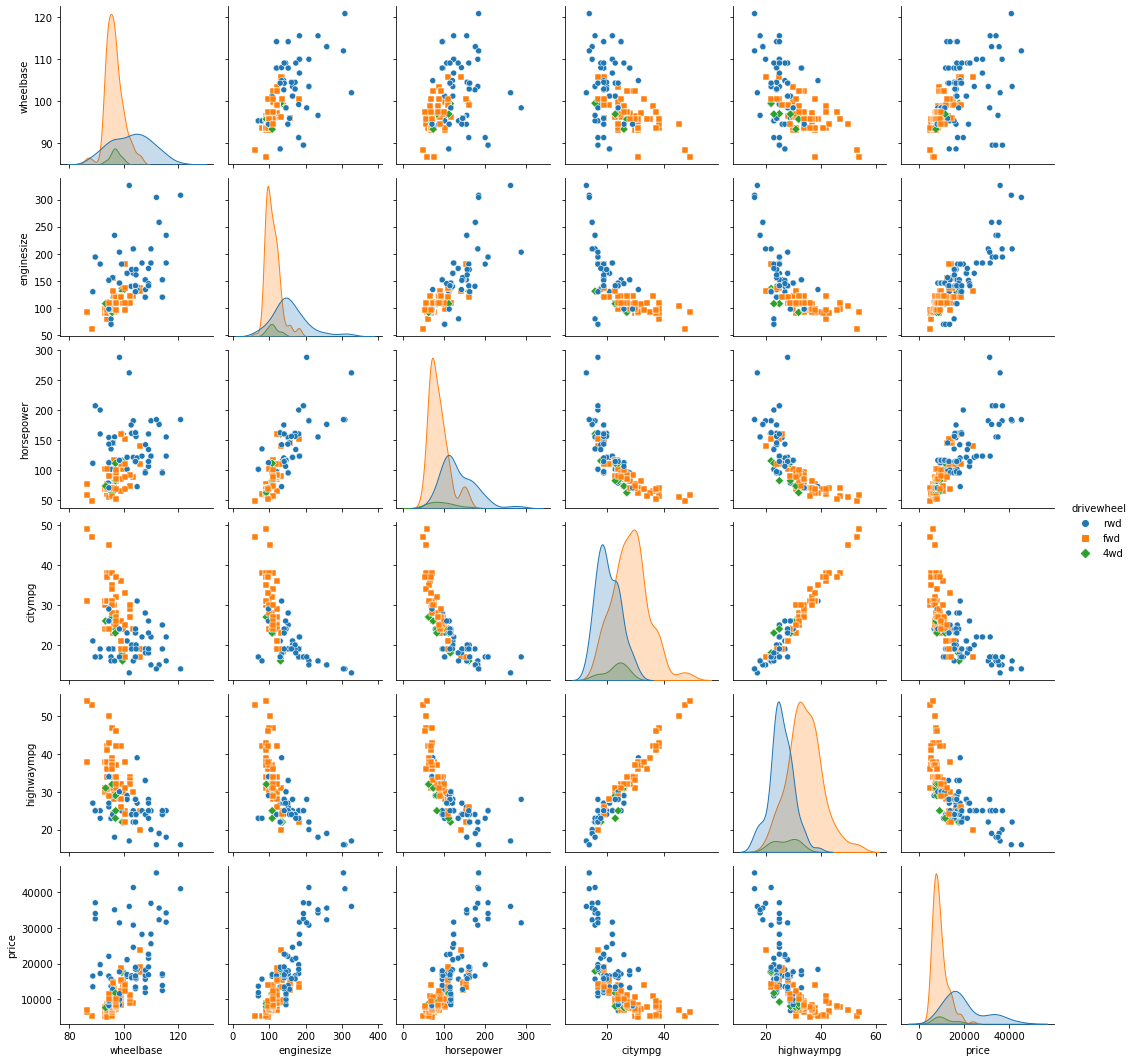

In [12]:

sns.pairplot(data[['wheelbase','enginesize','horsepower','citympg','highwaympg','drivewheel','price']],hue='drivewheel', markers=["o", "s", "D"])
plt.show()

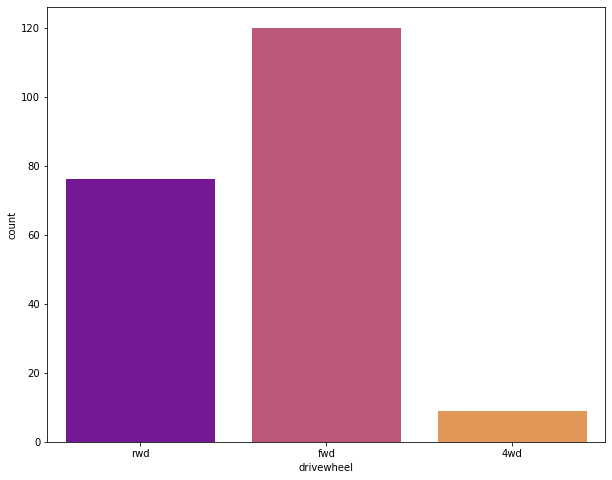

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='drivewheel',palette='plasma')
plt.show()

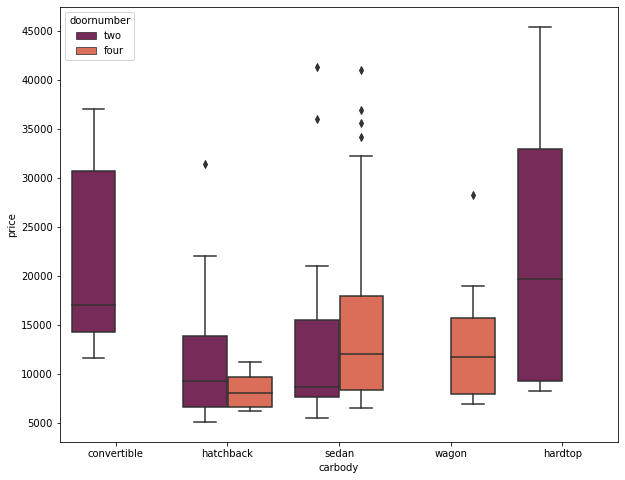

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='carbody', y='price',hue='doornumber',palette='rocket')
plt.show()

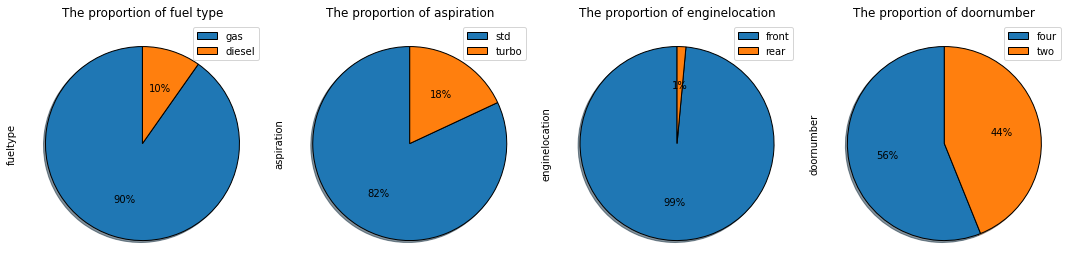

In [15]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 4, 1)  # Subplot 1: Fuel Type
count1 = data.fueltype.value_counts()
count1.plot(kind='pie', shadow=True, wedgeprops={'edgecolor': 'black'}, autopct="%1.0f%%", startangle=90,
            labels=None)
plt.legend(labels=count1.index, loc='upper right')
plt.title("The proportion of fuel type")

# Subplot 2
plt.subplot(1, 4, 2)  # Subplot 2: Aspiration
count2 = data.aspiration.value_counts()
count2.plot(kind='pie', shadow=True, wedgeprops={'edgecolor': 'black'}, autopct="%1.0f%%", startangle=90,
            labels=None)
plt.legend(labels=count2.index, loc='upper right')
plt.title("The proportion of aspiration")

plt.subplot(1, 4, 3)  # Subplot 3: enginelocation
count3 = data.enginelocation.value_counts()
count3.plot(kind='pie', shadow=True, wedgeprops={'edgecolor': 'black'}, autopct="%1.0f%%", startangle=90,
            labels=None)
plt.legend(labels=count3.index, loc='upper right')
plt.title("The proportion of enginelocation")

plt.subplot(1, 4, 4)  # Subplot 3: doornumber
count4= data.doornumber.value_counts()
count4.plot(kind='pie', shadow=True, wedgeprops={'edgecolor': 'black'}, autopct="%1.0f%%", startangle=90,
            labels=None)
plt.legend(labels=count4.index, loc='upper right')
plt.title("The proportion of doornumber")

plt.tight_layout()  # To adjust spacing between subplots
plt.show()

# Model Building

## Data preprocessing and spliting

In [16]:
y=data.iloc[:,-1]

In [17]:
x=data.drop(['car_ID','CarName','stroke','compressionratio','peakrpm','symboling','carheight','price'],axis=1)

In [18]:
object_data=[]
for col in x:
    if x[col].dtypes=='object':
        object_data.append(col)

In [19]:
object_data

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [20]:
x=pd.get_dummies(data=x,columns=object_data,drop_first=True)

In [21]:
x.shape

(205, 38)

In [22]:
x.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [24]:
x_train.shape

(143, 38)

In [25]:
x_test.shape

(62, 38)

## Model selection and training 

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
ypred1=lr.predict(x_train)

In [29]:
ypred2=lr.predict(x_test)

## Model evaluation

In [30]:
print(f"Mean square error for training set is {MSE(ypred1,y_train)/2}")
print(f"R squared error for training set is {np.round(r2_score(ypred1,y_train),2)*100} %")

Mean square error for training set is 2499140.800664018
R squared error for training set is 93.0 %


In [31]:
print(f"Mean square error for testing set is {MSE(ypred2,y_test)/2}")
print(f"R squared error for testing set is {np.round(r2_score(ypred2,y_test),2)*100} %")

Mean square error for testing set is 3841182.752776324
R squared error for testing set is 83.0 %
